<a href="https://colab.research.google.com/github/theaveas/DeepLearning/blob/main/DLwithPython/chp02_dlwithpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Mathematical building blocks of Neural Network
This notebook is a summary / self-notes for Chapter 2 [Deep Learning With Python - by Francois Chollet, Second Edition](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_3?crid=G0ITEJNSAY1K&keywords=deep+learning+with+python+2nd+edition&qid=1644115977&s=books&sprefix=deep+learning+with+pyt%2Cstripbooks%2C518&sr=1-3).\
This notebook code concept and diagrams are borrowed from the book and reproduced by me

## A first look at a neural network
#### Loading the mnist dataset in [Keras](https://keras.io/)

In [ ]:
# import libraries
from tensorflow.keras.datasets import mnist

# load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Train set, and Test set

In [ ]:
# inspect training set "shape"
print(X_train.shape)

# length of training set
print(len(X_train))

(60000, 784)
60000


In [ ]:
# inspect test set "shape"
print(y_test.shape)

# length of test set
print(len(y_test))

(10000,)
10000


#### Network architecture

In [ ]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers

#### Sequential model
The core component of neural network is **Layers**. \
Normaly a NN architecture contains one **Input Layer**, two or more **Hiddden Layers** and one **Output Layer**.\
To construct this architecture we can use `Keras` API [Sequential](https://keras.io/guides/sequential_model/)

In [ ]:
# building network layers
nn = keras.Sequential([
                       layers.Dense(512, activation='relu'),
                       layers.Dense(10, activation='softmax')
])

#### Compile
To training our neural net model we need to configure our model by chossing an `optimizer`, `loss function`, `matrics`.

In [ ]:
nn.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### Preparing the image data

In [ ]:
X_train = X_train.reshape((60000, 28*28)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

#### Fitting the model

In [ ]:
nn.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 2.3083 - accuracy: 0.1052
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 2.3078 - accuracy: 0.1049
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 2.3076 - accuracy: 0.1053
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 2.3072 - accuracy: 0.1056
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 2.3073 - accuracy: 0.1068


#### Evaluating the model on new data

In [ ]:
loss, accuracy = nn.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 36.4386 - accuracy: 0.8512
Test accuracy: 0.8511999845504761


#### Using the model to make predictions

In [ ]:
# predict the first ten digits of test set
test_digits = X_test[0:10]
predictions = nn.predict(test_digits)
print(f'Probabilitiy distribution: \n{predictions[1]}')

print(f'Highest distribution: {predictions[1].argmax()}')

Probabilitiy distribution: 
[2.5063467e-03 1.3439555e-04 9.5684767e-01 1.6817063e-02 7.3816324e-08
 8.7514184e-03 1.0703423e-02 2.8342479e-08 4.2394488e-03 8.7363944e-08]
Highest distribution: 2


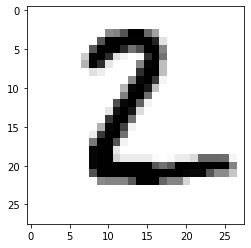

image label: 2


In [ ]:
# displaying the digit
# import library
from matplotlib import pyplot as plt

# reloading the mnist dataset in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digit = X_test[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print('image label:', y_test[1])

## Data representation for neural network

In [ ]:
# import library
import numpy as np

#### Scalars (rank-0 tensor)
A tensor that contains only one number.

In [ ]:
x = np.array(8)
print(x.ndim)

0


#### Vectors (rank-1 tensors)


In [ ]:
x = np.array((8, 26))
print(x.ndim)

1


#### Matrices (rank-3 tensor)
An array of an array.\
In some case, We also call as `rows` and `coluumns`. In neural networks **Matrices data** could be represent as **(sample, features)**

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x.ndim)

2


#### High dimensionn tensor (Higher rank tensors)
In neural network, A 3 dimension tensor could be represent as **Timeseries data** or **Sequence data** with the shape of **(samples, timesteps, features)**. A 4dimensional tensor could be represent as an **Image**, and we already seen in the previous training example-- **(sameple, widht, height, channels)**

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x.ndim)

3


#### Key attributes
A tensor is defined by three key attribute: **number of axes**, **shape** and **data type**.

In [ ]:
print(f'number of axes: {x.ndim},\n\
shape: {x.shape},\n\
data type: {x.dtype}')

number of axes: 3,
shape: (3, 3, 5),
data type: int64


## Manipulating tensors in Numpy
In neural network, due to a huge dataset, using pure python to loop through each dataset to do a calculation need a lot of computation power and take a lot of time.\
By using **Numpy** Python built-in library we can use **basic linear algebra** easily without using for loop, This process call `Vectorization`.

In [ ]:
# load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Slicing

In [ ]:
my_slice = X_train[10:100]
print(my_slice.shape)

(90, 28, 28)

#### The notation of batch

In [ ]:
# batch 
batch1 = X_train[:128]
batch1.shape

(128, 28, 28)

In [ ]:
# next batch
batch2 = X_train[128:128*2]
batch2.shape

(128, 28, 28)

In [ ]:
# the nth batch
n = 3
batch_size = 128

batchn = X_train[n*batch_size:(n+1)*batch_size]

## The engine of neural network
---

## Reimplementing neural network from scatch in Tensorflow

In [ ]:
# import libraries
import tensorflow as tf

In [ ]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights


In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28*28)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

fit(model, X_train, y_train, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.11
loss at batch 100: 2.25
loss at batch 200: 2.19
loss at batch 300: 2.07
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.87
loss at batch 100: 1.88
loss at batch 200: 1.81
loss at batch 300: 1.70
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.55
loss at batch 100: 1.58
loss at batch 200: 1.48
loss at batch 300: 1.40
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.29
loss at batch 100: 1.34
loss at batch 200: 1.22
loss at batch 300: 1.19
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 1.02
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.91
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40